
# Praktikum Text Classification: Sentiment Analysis

Pada notebook ini, Anda akan belajar klasifikasi sentimen teks menggunakan dataset movie reviews dari NLTK dengan model Naive Bayes.


In [1]:
import nltk
from nltk.corpus import movie_reviews
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Memuat data dan label
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Acak data agar sebaran label merata
random.shuffle(documents)

# Pisahkan teks dan label
texts = [text for (text, label) in documents]
labels = [label for (text, label) in documents]

print(f'Total dokumen: {len(texts)}')
print(f'Contoh label: {labels[:5]}')


Total dokumen: 2000
Contoh label: ['neg', 'neg', 'pos', 'neg', 'pos']


In [3]:
# Split data menjadi train dan test (80%-20%)
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42)

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

print(f'Fitur TF-IDF dimensi: {X_train.shape}')


Fitur TF-IDF dimensi: (1600, 3000)


In [4]:
# Inisialisasi dan latih model Naive Bayes
model = LogisticRegression()
model.fit(X_train, labels_train)


LogisticRegression()

In [5]:
# Prediksi pada data uji
labels_pred = model.predict(X_test)

# Evaluasi model
print('Confusion Matrix:')
cm = confusion_matrix(labels_test, labels_pred)
print(cm)

print('\nClassification Report:')
print(classification_report(labels_test, labels_pred))

print('Accuracy:', accuracy_score(labels_test, labels_pred))

Confusion Matrix:
[[161  23]
 [ 38 178]]

Classification Report:
              precision    recall  f1-score   support

         neg       0.81      0.88      0.84       184
         pos       0.89      0.82      0.85       216

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

Accuracy: 0.8475


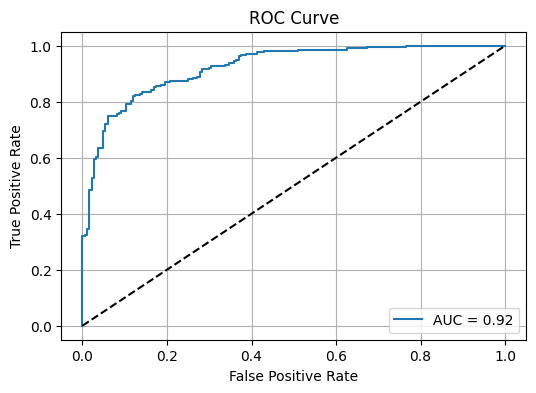

In [6]:
# ROC Curve dan AUC
Y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(labels_test, Y_prob, pos_label='pos')
auc = roc_auc_score(labels_test, Y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

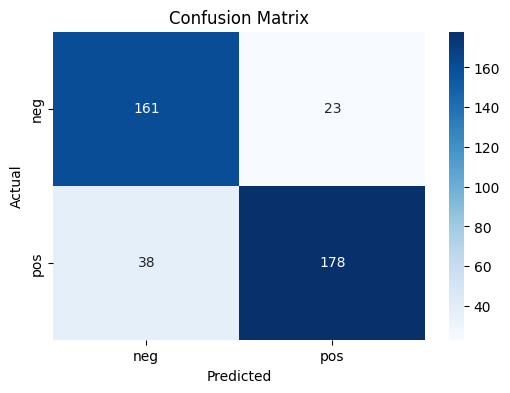

In [7]:
# Visualisasi confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm, model.classes_)


---
## Tugas dan Eksperimen Lanjutan

- Ganti model Naive Bayes dengan Logistic Regression dan bandingkan hasil.
- Tambahkan preprocessing stopword removal, stemming, atau lemmatization.
- Coba representasi embedding kata seperti Word2Vec.
- Visualisasikan hasil lebih lanjut seperti ROC curve.
- Terapkan ke dataset lain yang Anda punya.
